# HSI Biopsy Data Analysis Example

This notebook demonstrates basic loading and analysis of hyperspectral imaging data from biopsy samples.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Add project root to path
sys.path.append('..')

# Import project modules
from src.dataset import HSIDataset
from src.constants import ALL_PATIENT_IDS

## Data Loading

In this section, we'll load the HSI data using the restructured HSIDataset class where each sample represents a single HSI cube.

In [5]:
# Initialize the dataset
hsi_dataset = HSIDataset()

[print(i) for i in hsi_dataset.cube_samples]

# Get total number of HSI cubes in the dataset
print(f"Total HSI cubes in dataset: {len(hsi_dataset)}")

{'combined_id': '1.10_1', 'patient_id': 'S1.10', 'fov': '1', 'file_path': '/mnt/Drive3/ivan/biopsy2.0/HyperProbe1.1_Biopsy_S1.10_FOV1.mat', 'metadata': {'id': 'S.1.10', 'age': 76.0, 'sex': 'M', 'type_of_tumor': 'Mening.', 'grading': 1.0, 'additional_info': 'meningioma parasagittale fronto-parietale bilaterale\n', 'histology': 'Meningioma transizionale, grado 1 WHO CNS 2021.', 'Ki-67-index': '8-10%', 'normalized_id': 'S1.10'}}
{'combined_id': '1.11_1', 'patient_id': 'S1.11', 'fov': '1', 'file_path': '/mnt/Drive3/ivan/biopsy2.0/HyperProbe1.1_Biopsy_S1.11_FOV1.mat', 'metadata': {'id': 'S.1.11', 'age': 78.0, 'sex': 'M', 'type_of_tumor': 'Mening.', 'grading': 1.0, 'additional_info': 'meningioma clinoideo sn', 'histology': 'Meningioma secretorio, grado 1 WHO CNS 2021.', 'Ki-67-index': '5%%', 'normalized_id': 'S1.11'}}
{'combined_id': '1.17_1', 'patient_id': 'S1.17', 'fov': '1', 'file_path': '/mnt/Drive3/ivan/biopsy2.0/HyperProbe1.1_Biopsy_S1.17.mat', 'metadata': {'id': 'S.1.17', 'age': 74.0,

In [3]:
# Get a single HSI cube by index
sample = hsi_dataset.get_sample_by_combined_id('1.28_1')
print(f"\nSample combined ID: {sample['combined_id']}")
print(f"Patient ID: {sample['patient_id']}")
print(f"FOV: {sample['fov']}")

# Print shape of the HSI cube
print(f"HSI cube shape: {sample['hsi_cube'].shape}")

# Print metadata
print("\nMetadata:")
for key, value in sample['metadata'].items():
    print(f"  {key}: {value}")


Sample combined ID: 1.28_1
Patient ID: S1.28
FOV: 1
HSI cube shape: (127, 2048, 2048)

Metadata:
  id: S. 1.28
  age: 82.0
  sex: F
  type_of_tumor: Mening
  grading: 2.0
  additional_info: Recidiva di meningioma di convessità parietale grado II WHO
  histology: Meningioma atipico, grado 2
  Ki-67-index: 20 %
  normalized_id: S1.28


## Visualization

Let's visualize the data by creating an RGB representation and looking at some spectral signatures.

/home/home/tim_ivan/thesis/tim_thesis/notebooks/../src/visualize_data.py:38: UserWarning: You passed a edgecolor/edgecolors ([]) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_plot = ax_img.scatter([], [], c=[], s=100, marker="+", edgecolors=[])


Button(description='Clear Selection', style=ButtonStyle())

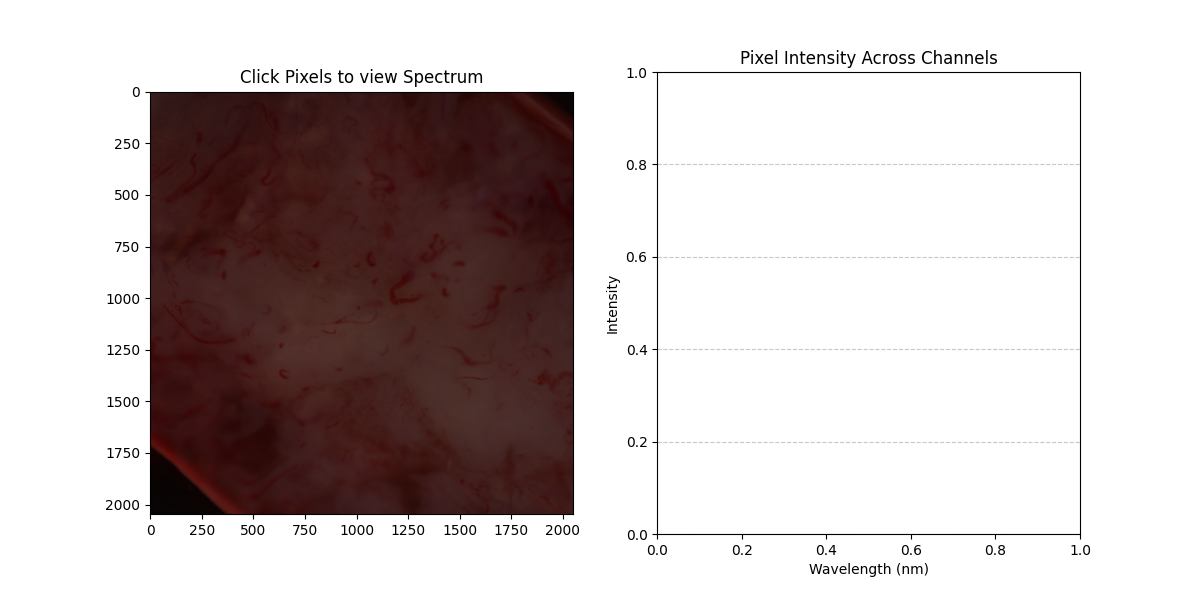

In [4]:
from src.visualize_data import show_interactive_image_with_spectrum

%matplotlib widget
show_interactive_image_with_spectrum(sample['hsi_cube'])

## Accessing Samples in Different Ways

The restructured HSIDataset provides multiple methods to access samples:

In [ ]:
# 1. Get a sample by combined ID (patient_number_fov)
patient_num = sample['combined_id'].split('_')[0]  # Get from first sample
fov_num = sample['combined_id'].split('_')[1]
combined_id = f"{patient_num}_{fov_num}"
sample_by_combined_id = hsi_dataset.get_sample_by_combined_id(combined_id)
print(f"\nSample retrieved by combined ID '{combined_id}':\n  Patient ID: {sample_by_combined_id['patient_id']}\n  FOV: {sample_by_combined_id['fov']}")

# 2. Get all samples for a specific patient
patient_id = sample['patient_id']  # Get from first sample
patient_samples = hsi_dataset.get_samples_by_patient_id(patient_id)
print(f"\nFound {len(patient_samples)} samples for patient '{patient_id}'")
for i, ps in enumerate(patient_samples):
    print(f"  Sample {i+1}: FOV {ps['fov']}, HSI cube shape {ps['hsi_cube'].shape}")

# 3. Get a specific sample by patient ID and FOV
specific_sample = hsi_dataset.get_sample_by_patient_and_fov(patient_id, fov_num)
print(f"\nRetrieved specific sample - Patient: {specific_sample['patient_id']}, FOV: {specific_sample['fov']}")

## Displaying Patient Samples with Metadata

The function `display_with_metadata` allows us to view all HSI samples for a specific patient alongside their metadata.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/home/tim_ivan/thesis/tim_thesis/.venv/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


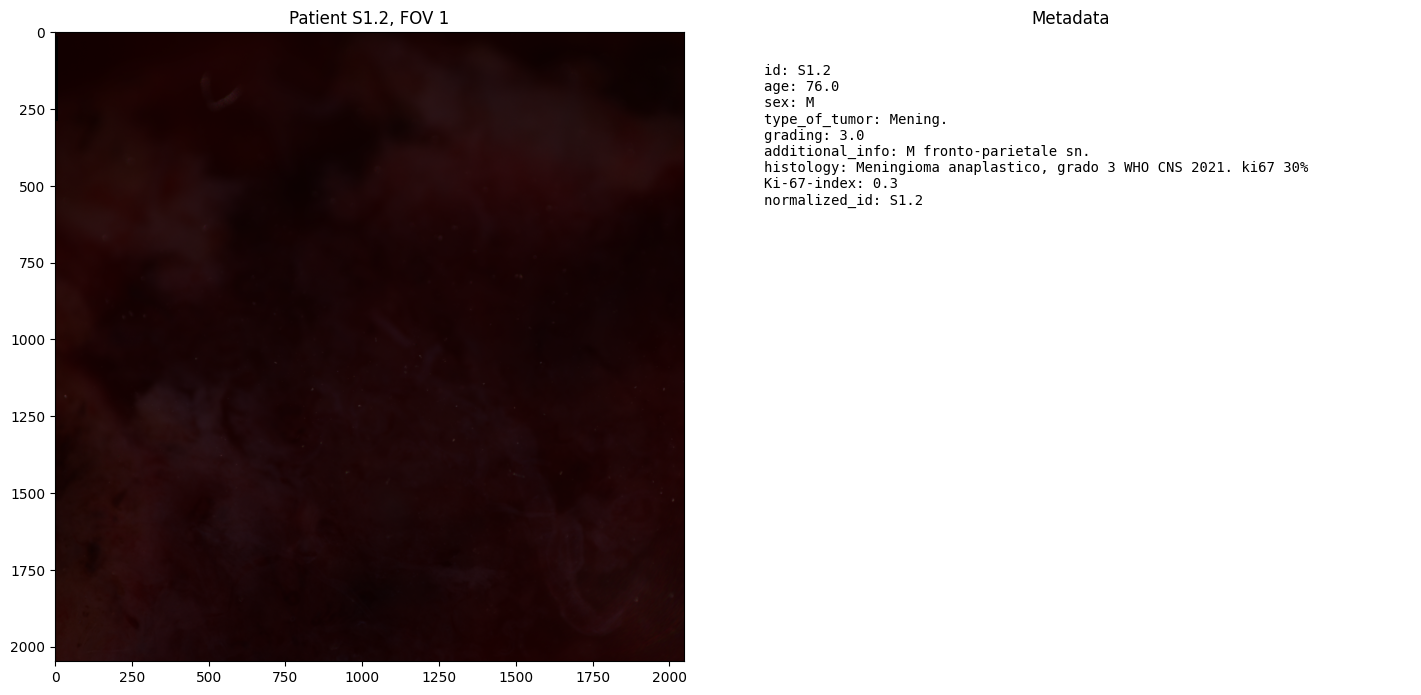

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


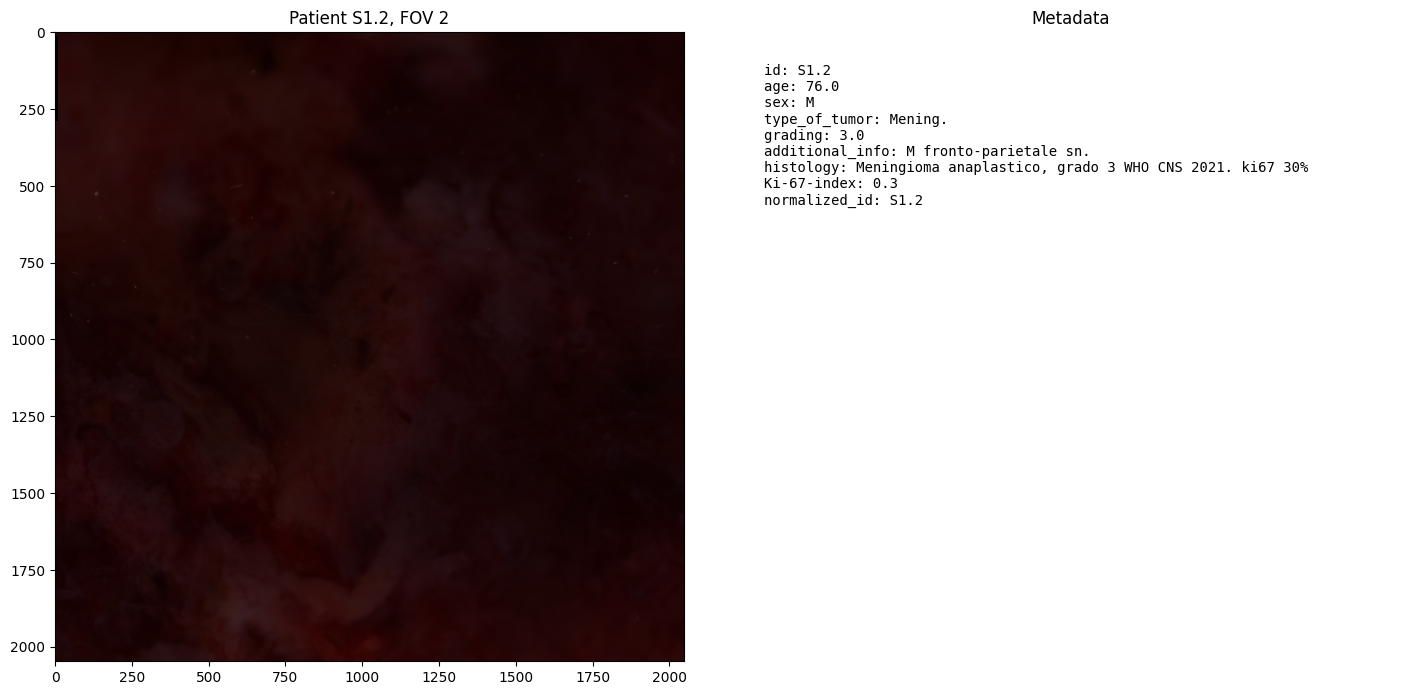

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


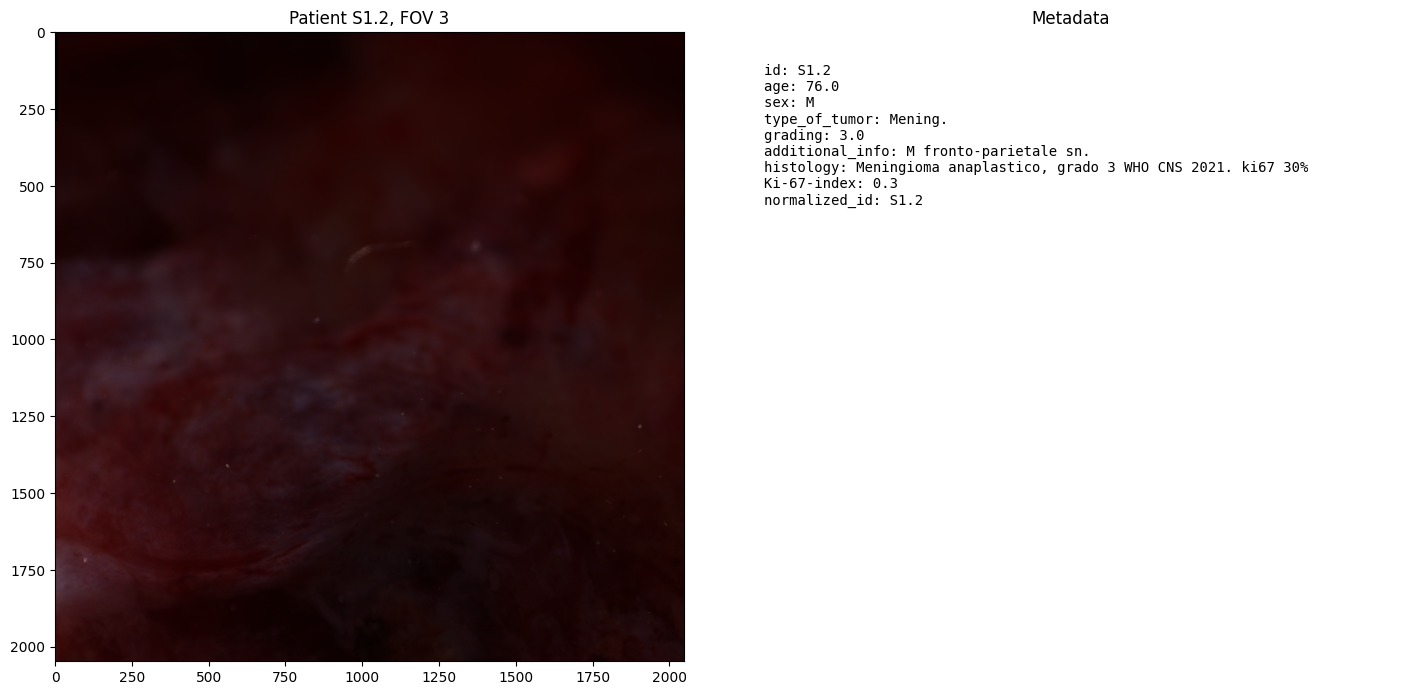

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


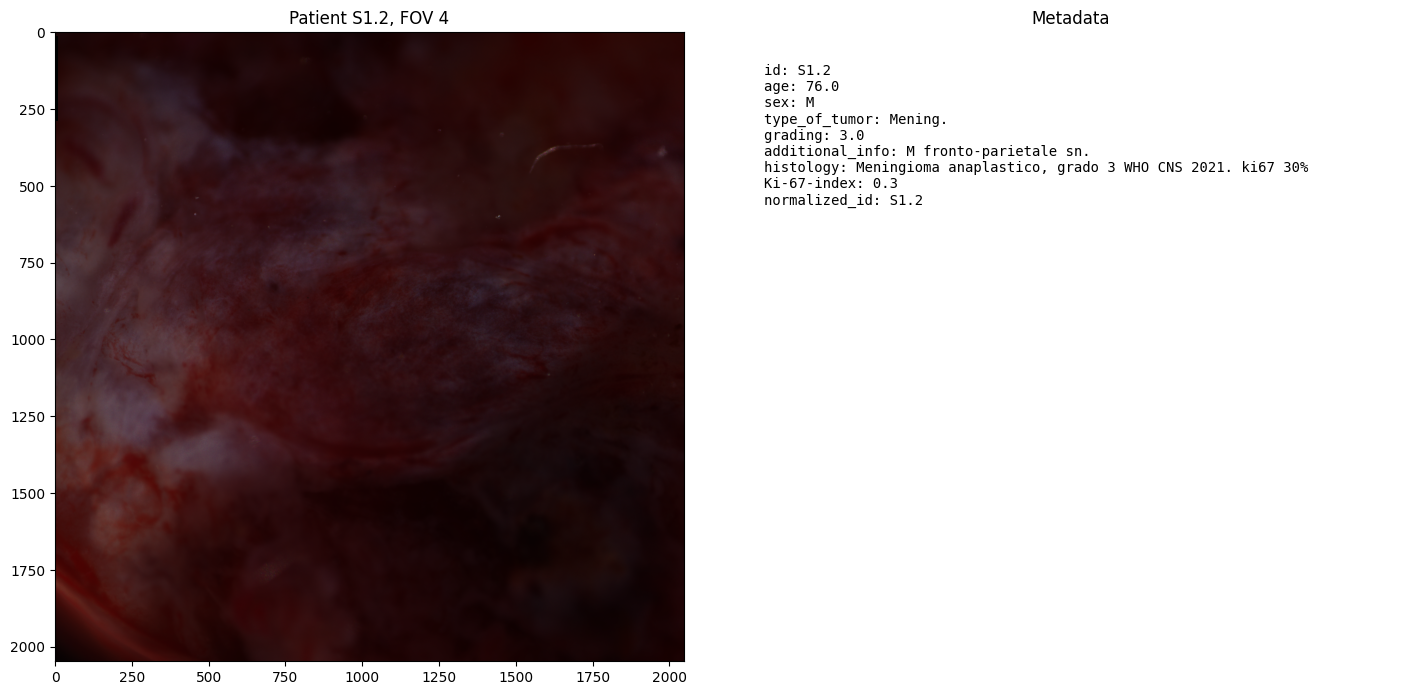

In [8]:
from src.visualize_data import display_with_metadata

# Get a patient ID from the first sample or use a specific one

patient_id = ALL_PATIENT_IDS.S1_2
# Display all samples for this patient with their metadata
display_with_metadata(hsi_dataset, patient_id)